<a href="https://colab.research.google.com/github/Isaac-PM/ai-character-recognition/blob/main/first_approach_neural_networks_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimiento de dígitos (números)

## Generalidades

- Se usan imágenes de 28x28 píxeles, siendo en total 784 píxeles.
- Cada píxel tiene un valor que se encuentra en un rango de 0 a 255, siendo **0 completamente negro** y **255 completamente blanco**.
- Red neuronal<sup>1</sup> de dos capas<sup>2</sup>, sin contar la capa de entrada como una.
- El conjunto de datos a utilizar es **_MNIST database_**.
- La idea central es, que durante el proceso de entrenamiento de la red, los parámetros de esta se ajusten para aproximarse a una función deseada (reconocer dígitos).

<center><img   src="https://i.imgur.com/Rn65Uqq.jpg"   width=""   height=""   /></center>

_Elaboración propia._

***

# La Red <sup>[D]</sup>

<center><img   src="https://i.imgur.com/UzADRvF.jpg"   width=""   height=""   /></center>

_Elaboración propia._

## Matriz inicial

\begin{align}
    &m = \text{número de imágenes} \\
    &X = \begin{bmatrix}
 x_{1\,1}&  x_{1\,2}&  x_{1\,...}& x_{1\,784}\\ 
 x_{2\,1}&  x_{2\,2}&  x_{2\,...}& x_{2\,784}\\ 
 x_{m-1\,1}&  x_{m-1\,2}&  x_{m-1\,...}& x_{m-1\,784}\\ 
 x_{m\,1}&  x_{m\,2}&  x_{m\,...}& x_{m\,784}
\end{bmatrix}
\end{align}

Se trabaja con la matriz transpuesta de $X$ ($X^{t}$), por lo que hay $m$ columnas con 784 filas.

## Propagación hacia adelante (_forward propagation_)

\begin{align}
    &A^{[0]} = \text{capa de entrada (input layer)} \\
    &Z^{[1]} = \text{capa oculta (desactivada) (hidden layer)}
\end{align}

Con la finalidad de obtener $Z^{[1]}$, se deberá aplicar un peso (_weight_, $W^{[1]}$) y un sesgo (_bias_, $B^{[1]}$), de manera que:

\begin{align}
    &Z^{[1]} = W^{[1]}\cdot A^{[0]} \ + \ B^{[1]} \\
    &W^{[1]} = \text{pesos de las conexiones de la primera capa (first layer connections weight)}
\end{align}

Posteriormente, se aplica una "función de activación", en este caso **ReLU**<sup>3</sup>.

\begin{align}
    &A^{[1]} \ = \ \text{ReLU}(Z^{[1]})
\end{align}

Y se pasa a la segunda capa:

\begin{align}
    &Z^{[2]} = W^{[2]}\cdot A^{[1]} \ + \ B^{[2]} \\
    &W^{[2]} = \text{pesos de las conexiones de la segunda capa} \\
    &\text{(second layer connections weight)}
\end{align}

Finalmente se aplicará la función de activación **softmax**<sup>3</sup>.


\begin{align}
    &\begin{bmatrix}
6.66\\ 
2.5\\ 
1.3
\end{bmatrix}\rightarrow \, \frac{e^{z_{i}}}{\sum_{j \ = \ 1}^{K}e^{z_{j}}} \,\rightarrow \, \begin{bmatrix}
0.95\\ 
0.027\\ 
0.023
\end{bmatrix}
\end{align}

En el lado izquierdo se observan los valores de una capa de entrada (_input layer_), posterior a aplicada la función **softmax** estos valores se transforman en probabilidades, correspondiento a la probabilidad de que una imagen sea de cierta clase.

\begin{align}
    &A^{[2]} \ = \ \text{softmax}(Z^{[2]})
\end{align}

## Propagación hacia atrás (_backwards propagation_)

Se trata de ajustar los pesos según su contribución a la predicción inicial de la red. 

En este caso, se resta el _label_ que sí le correspodía a la imagen procesada, por ejemplo, si el _label_ indicaba un 7, se hace esta resta a $A^{[2]}$, de la siguiente manera:

\begin{align}
    &A^{[2]} - \begin{bmatrix}
0...\\ 
0...\\ 
0...\\ 
0...\\ 
0...\\ 
0...\\ 
0...\\ 
1...\\ 
0...\\ 
0...
\end{bmatrix}
\end{align}

Nótese que el espacio en la matriz (ver tamaños reales abajo) que representa un 7 se le asigna un 1.

El proceso busca determinar el error en la predicción, además se debe encontrar la contribución de $W^{[x]}$ y $B^{[x]}$, al error $dZ^{[x]}$.

\begin{align}
    &(a)\,\,dZ^{[2]} = A^{[2]} - Y \ \text{(según label)} \\
    &(b)\,\,dW^{[2]} = \frac{1}{m}dZ^{[2]}A^{[1]t} \\
    &(c)\,\,dB^{[2]} = \frac{1}{m}\Sigma dZ^{[2]} \\
    &(d)\,\,dZ^{[1]} = W^{[2]t} dZ^{[2]} \cdot  g\prime (Z^{[1]}) \\
    &\text{ siendo g la función de activación} \\
    &(e)\,\,dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]t} \\
    &(f)\,\,dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}
\end{align}

<ol type="a">
  <li>Encuentra los errores de la segunda capa; por cuánto falló.</li>
  <li>Cuánto se deben ajustar los pesos de la segunda capa, según el error anterior.</li>
  <li>Ajuste de los sesgos.</li>
  <li>Toma los errores en la seguna capa, y se le aplican los pesos "en reversa", con la finalidad de encontrar los errores para la primera capa, y continuar con el ajuste.</li>
  <li>Ajuste de los pesos de la primera capa.</li>
  <li>Ajuste de los sesgos de la primera capa.</li>
</ol>

## Actualización de parámetros

Los parámetros de la red se actualizan según los valores anteriormente obtenidos, de la siguiente manera:

\begin{align}
		&W^{[1]} = W^{[1]} - \alpha dW^{[1]} \\
		&B^{[1]} = B^{[1]} - \alpha dB^{[1]} \\
		&W^{[2]} = W^{[2]} - \alpha dW^{[2]} \\
		&B^{[2]} = B^{[2]} - \alpha dB^{[2]} \\
\end{align}

Siendo $\alpha$ el _learning rate_<sup>[H]</sup>.

**Finalmente se repiten los tres pasos, queriendo acercar la red a la funcionalidad esperada.**

## Tamaños reales de las matrices <sup>[H]</sup>

### Propagación hacia delante
- $A^{[0]} = X$: 784 * m
- $A^{[0]t} = X^{t}$: m * 784
- $Z^{[1]} \sim A^{[1]}$: 10 * m
- $W^{[1]}$: 10 * 784 (según $W^{[1]}A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 * 1 (10 * m)
- $Z^{[2]} \sim A^{[2]}$: 10 * m
- $W^{[2]}$: 10 * 10 (según $W^{[2]}A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 * 1 (10 * m)

### Propagación hacia atrás

- $dZ^{[2]}$: 10 * m ($~A^{[2]}$)
- $dW^{[2]}$: 10 * 10
- $dB^{[2]}$: 10 * 1
- $dZ^{[1]}$: 10 * m ($~A^{[1]}$)
- $dW^{[1]}$: 10 * 10
- $dB^{[1]}$: 10 * 1

***

## Conceptos
### Red neuronal<sup>1</sup>

Se trata de un campo de estudio de la informática, que trata de "reflejar" el comportamiento del cerebro humano en el reconocimiento de patrones.<sup>[A]</sup>

Una red se ve compuesta por:<sup>[A]</sup> 

- Capa de entrada (_input layer_).
- Capas ocultas (_deep neural network_ ó _hidden layers_).
- Capa de sálida (_output layer_).

#### Funcionamiento

- Cada nodo se conecta a otro, con un peso asociado.
- Si la salida de un nodo se encuentra por encima de un umbral (_threshold_), se activa, mandando sus datos a la siguiente capa de la red.

<center><img   src="https://i.imgur.com/kP4Dma1.jpg"   width=""   height=""   /></center>

_Elaboración propia._<sup>[B]</sup>

### Capas<sup>2</sup>

Las capas son el metacomponente principal de las redes neuronales. En cuanto a la **red oculta**, esta realiza distintas funciones que se encargan de la transformación (análisis) de los datos.<sup>[C]</sup>

#### Neuronas (nodos)

Las neuronas, son los componentes de las capas, comunicadas por conexiones, las cuales tienen un peso asignado.<sup>[D]</sup>


### Funciones de activación<sup>3</sup> <sup>[E]</sup>

Si se mantuviese la red de una forma lineal, recordando que, las neuronas de la red reciben una suma ponderada de de sus entradas (más el sesgo), dando el resultado a la siguiente capa, por lo que el resultado (en este caso) sería el equivalente a operar en una sola capa esos valores. 

La función de activación se colocará entre el receptor de la siguiente capa y la suma lineal de los componentes de la capa anterior.

<center><img   src="https://i.imgur.com/niNM2kL.jpg"   width=""   height=""   /></center>

_Elaboración propia._

Este ajuste servirá para el posterior proceso de propagación hacia atrás (backwards propagation), en el cual con ayuda de la derivada de la función de costo, se ajustarán los pesos de las conexiones dependiendo de como se ajuste a la predicción esperada.

Algunas funciones son:

- Sigmoide (logística): tomando en cuenta el [problema del desvanecimiento de gradiente](https://es.wikipedia.org/wiki/Problema_de_desvanecimiento_de_gradiente), se puede usar en clasificación binaria (perro o gato)
- Tangente hiperbólica: comprende valores de -1 a 1, dando resultados más específicos que la Sigmoide.

#### ReLU (unidad lineal rectificada) <sup>[E]</sup>

\begin{align}
    &f(x)=\max(0,x)
\end{align}

Esta función no se encuentra acotada para números positivos, permitiendo un aprendizaje más rápido de la red.

#### Softmax <sup>[F], [G]</sup>

Es un tipo de función la cual soporta "sistemas de clasificación multinomial", siendo útil en el presente caso. 

Esta devuelve la distribución de probabilidad de cada una de las clases (posibles categorías, en este caso los dígitos).

Posee la siguiente fórmula:

\begin{align}
    &\sigma (\overrightarrow{z})_{i} \ = \ \frac{e^{z_{i}}}{\sum_{j \ = \ 1}^{K}e^{z_{j}}} \\
    &\overrightarrow{z} = \text{vector de entrada (input vector).} \\
    &z_{i} = \text{todos los valores del vector de entrada (input vector values).} \\
    &e^{z_{i}} = \text{valor mayor que 0, pequeño si la entrada fue negativa, grande si la entrada lo fue.} \\
    &\text{(value greater than 0, if the input was negative the value is small, otherwise it is large.)} \\
    &\sum_{j \ = \ 1}^{K}e^{z_{j}} = \text{normaliza el valor en el rango [0,1].} \\
    &\text{(normalizes the value in the range [0,1].)} \\
    &K = \text{número de clases (class number).}
\end{align}

### _Learning rate_<sup>4</sup> <sup>[I]</sup>

Se trata de un "hiperparámetro" (denotado por $\alpha$), el cual regula los pesos de la red, respecto al gradiente de pérdida. Indica la frecuencua de actualización de la red.

### Codificación _one-hot_<sup>5</sup> <sup>[K]</sup>

Se utiliza para codificar las etiquetas (_labels_) en números enteros o vectores de números enteros que puedan ser entendidos por la red. Tanto para las entradas como para la interpretación de las salidas. 

Específicamente el _one-hot_ transforma las etiquetas a vectores de ceros y unos.

El largo del vector es proporcional al número de clases (categorías), por ejemplo, se poseen tres posibles objetos:

- Gato.
- Perro.
- Pepinillo.

El _one-hot encoding_ para este caso sería:

- Gato: [1, 0, 0]
- Perro: [0, 1, 0]
- Pepinillo: [0, 0, 1]

Donde cada espacio corresponde a cada clase, siendo donde hay un "1" la clase en específico.

### Pérdida<sup>6</sup> <sup>[L]</sup>

Penalización por una mala predicción, siendo un número que indica lo mala que fue una predicción.
El objetivo del entrenamiento es conseguir un conjunto de "ponderaciones" cuyo promedio presente la menor pérdida posible.

### _Gradient descent_<sup>7</sup> 

Es usado para:

- Actualizar los pesos de la red.
- Reducción de la pérdida.

Las modificaciones de los pesos se harán de acuerdo al _learning rate_ definido.

## Referencias

- <sup>[A]</sup> What are Neural Networks? (2021, August 03). Retrieved from https://www.ibm.com/cloud/learn/neural-networks
- <sup>[B]</sup> ELEMENTOS BÁSICOS DE UNA RED NEURONAL ARTIFICIAL. (2007, October 01). Retrieved from https://advancedtech.wordpress.com/2007/08/31/elementos-basicos-de-una-red-neuronal-artificial
- <sup>[C]</sup> Singh, H. (2021). Neural Network | Introduction to Neural Network | Neural Network for DL. Analytics Vidhya. Retrieved from https://www.analyticsvidhya.com/blog/2021/03/basics-of-neural-network
- <sup>[D]</sup> Tech, R. (2021, July 07). Tu primera red neuronal en Python y Tensorflow. Youtube. Retrieved from https://www.youtube.com/watch?v=iX_on3VxZzk&list=PLZ8REt5zt2Pn0vfJjTAPaDVSACDvnuGiG
- <sup>[E]</sup> Tech, R. (2022, May 25). Funciones de activación a detalle (Redes neuronales). Youtube. Retrieved from https://www.youtube.com/watch?v=_0wdproot34
- <sup>[F]</sup> Las matemáticas del Machine Learning: Funciones de activación. (2021, June 25). Retrieved from https://empresas.blogthinkbig.com/las-matematicas-del-machine-learning-funciones-de-activacion
- <sup>[G]</sup> Softmax Function. (2019, May 17). Retrieved from https://deepai.org/machine-learning-glossary-and-terms/softmax-layer
- <sup>[H]</sup> wwsalmon. (2020). Simple MNIST NN from scratch (numpy, no TF/Keras). Kaggle. Retrieved from https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook
- <sup>[I]</sup> What is Learning Rate in Machine Learning | Deepchecks. (2021, August 05). Retrieved from https://deepchecks.com/glossary/learning-rate-in-machine-learning
- <sup>[J]</sup> Brownlee, J. (2019). How to Avoid Overfitting in Deep Learning Neural Networks - MachineLearningMastery.com. MachineLearningMastery. Retrieved from https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error
- <sup>[K]</sup> deeplizard. (2018, January 12). One-hot Encoding explained. Youtube. Retrieved from https://www.youtube.com/watch?v=v_4KWmkwmsU
- <sup>[L]</sup> Cómo usar el AA: entrenamiento y pérdida. (2022, September 26). Retrieved from https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss
- <sup>[M]</sup> Simplified, P. (2021, August 09). Gradient Descent - Simply Explained! ML for beginners with Code Example! Youtube. Retrieved from https://www.youtube.com/watch?v=jwStsp8JUPU
- <sup>[N]</sup> Thomas, A. (s.f.). An introduction to neural networks for beginners. Retrieved from https://adventuresinmachinelearning.com/wp-content/uploads/2017/07/An-introduction-to-neural-networks-for-beginners.pdf


In [102]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# LEYENDO DATOS

try:
    data = pd.read_csv('/content/drive/MyDrive/Data/train.csv') 
    """
    1) Descargar datos desde: https://www.kaggle.com/competitions/digit-recognizer/data
    2) Subir datos (train.csv) a una carpeta dedicada en Google Drive.
    3) Conectar Google Drive a Google Colab y "copiar ruta de acceso".
    4) Pegar la ruta en la lectura del archivo.

    P. D. Si los datos ya no están disponibles, contactarme.
    """
except:
    print('Error: Could not find file')
    exit()

data.head() # Verificando integridad de los datos, resultado: 5 filas x 785 columnas.

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# SEPARANDO DATOS

"""
    Los datos deben ser separados con la finalidad de evitar el "overfitting" de la red.
    El "overfitting" se trata de una red que "aprende lo suficientemente bien" el conjunto de datos,
    en tal magnitud, que no se comporta de la forma esperada con datos externos a ese conjunto. [J]

    Dev set (validation):
        Conjunto de verificación, utilizado para el ajuste de hiperparámetros.

    Training set:
        Conjunto de datos que se utiliza principalmente para el ajuste de parámetros.

    Test set:
        Conjunto usado para probar la funcionalidad de la red.
"""

data = np.array(data) # Ingresando los datos a un arreglo de numpy, para trabajar más fácilmente con ellos.
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T # Cada columna representará una imagen.
Y_dev = data_dev[0] # Fila de labels.
X_dev = data_dev[1:n] # Columnas (ejemplos, imágenes).
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train= data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [104]:
# CREANDO LA RED

def init_params(): # Inicialización de los parámetros con los que se trabajará (ver notas arriba).
    # Se crean matrices con valores aleatorios en el rango [0,1), de tamaño (x, y).
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784)) # "./" se asegura que el resultado sea float.
    B1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    B2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, B1, W2, B2

def relu(Z):
    # "np.maximun" recorre cada elemento "x_i" de "x", aplicando la función max(0, x_i).
    return np.maximum(Z, 0)

def derivative_relu(Z):
    return Z > 0

def softmax(Z):
    # AL igual que anteriormente, "np.exp" y "np.sum" aplica para todos los elementos "z_i" de "z".
    # A = (np.exp(Z) / np.sum(np.exp(Z)))
    return (np.exp(Z) / sum(np.exp(Z)))
    # "np.sum" devolverá un vector de "m" columnas, sumando todas las filas.

def forward_propagation(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # Se crea una matriz de ceros, de tamaño (Y.size, Y.max()) + 1) -> (~m, 10)
    one_hot_Y[np.arange(Y.size), Y] = 1 # Se recorre cada posición de la matriz y se le asigna un 1, donde la etiqueta lo indique.
    # one_hot_Y = one_hot_Y.T
    return one_hot_Y.T # Se devuelve transpuesta de manera que cada columna es un ejemplo.

def backwards_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y) # Concepto 5
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m  * dZ2.dot(A1.T)
    dB2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_relu(Z1)
    dW1 = 1 / m  * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1)
    return dW1, dB1, dW2, dB2

def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * dB1
    W2 = W2 - alpha * dW2
    B2 = B2 - alpha * dB2
    return W1, B1, W2, B2

In [105]:
# ENTRENANDO

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

iterations_arr = []
accuracy_arr = []

def gradient_descent(X, Y, alpha, iterations): # Concepto 7
    W1, B1, W2, B2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = backwards_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)   
        if i % 20 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
        iterations_arr.append(i)
        accuracy_arr.append(get_accuracy(get_predictions(A2), Y))          
    return W1, B1, W2, B2

W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
Accuracy:  0.08280487804878049
Iteration:  20
Accuracy:  0.4856829268292683
Iteration:  40
Accuracy:  0.676439024390244
Iteration:  60
Accuracy:  0.785829268292683
Iteration:  80
Accuracy:  0.8176585365853658
Iteration:  100
Accuracy:  0.8373414634146341
Iteration:  120
Accuracy:  0.8513414634146341
Iteration:  140
Accuracy:  0.8626585365853658
Iteration:  160
Accuracy:  0.8722926829268293
Iteration:  180
Accuracy:  0.8786829268292683
Iteration:  200
Accuracy:  0.8831707317073171
Iteration:  220
Accuracy:  0.8870975609756098
Iteration:  240
Accuracy:  0.8902682926829268
Iteration:  260
Accuracy:  0.8920487804878049
Iteration:  280
Accuracy:  0.8942682926829268
Iteration:  300
Accuracy:  0.8961219512195122
Iteration:  320
Accuracy:  0.8978048780487805
Iteration:  340
Accuracy:  0.8995365853658537
Iteration:  360
Accuracy:  0.9007317073170732
Iteration:  380
Accuracy:  0.902219512195122
Iteration:  400
Accuracy:  0.9033170731707317
Iteration:  420
Accuracy:  0.9043170731707

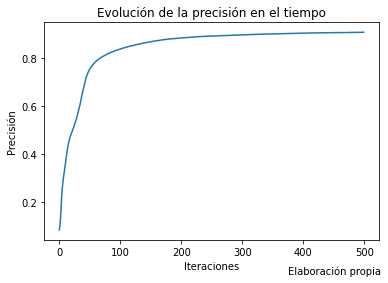

In [106]:
# MOSTRANDO RESULTADOS

plt.plot(iterations_arr, accuracy_arr)
plt.xlabel('Iteraciones')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión en el tiempo')
plt.text(375, -0.1, 'Elaboración propia')
plt.show()

Success!
Prediction:  [4]
Label:  4


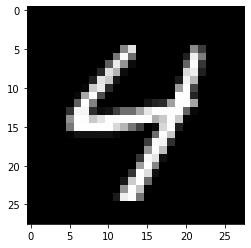


Failure!
Prediction:  [9]
Label:  7


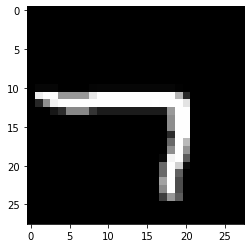


Success!
Prediction:  [4]
Label:  4


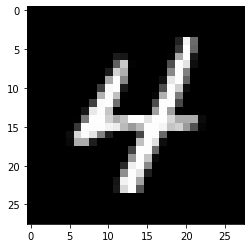


Success!
Prediction:  [1]
Label:  1


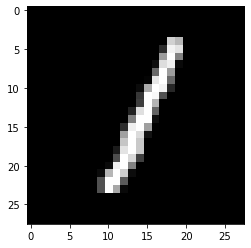


Success!
Prediction:  [9]
Label:  9


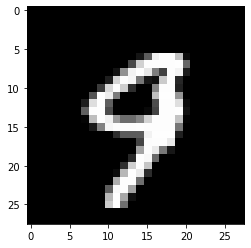

In [107]:
# MOSTRANDO RESULTADOS

import random

def make_predictions(X, W1, B1, W2, B2):
    _, _, _, A2 = forward_propagation(W1, B1, W2, B2, X) # Se envía al programa, con los datos ya entrenados.
    return get_predictions(A2) # Se extraen las predicciones de la última capa.

def test_prediction(index, W1, B1, W2, B2):
    current_image = X_train[:, index, None] # Busca una imagen según el índice administrado.
    prediction = make_predictions(current_image, W1, B1, W2, B2) # Envía los datos para ser procesados.
    label = Y_train[index] # Extrae la label.
    if prediction == label:
        print("Success!")
    else: print("Failure!")
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show() # Muestra la imagen usada.
    print()

for i in range(5):
    test_prediction(random.randint(0, 99), W1, B1, W2, B2)

<h2 style="text-align: center;">Licencia / License</h2>
<h3 style="text-align: center;">Isaac-PM @ <a href="https://github.com/Isaac-PM">https://github.com/Isaac-PM</a></h3>
<p style="text-align: center;">&nbsp;</p>
<p style="text-align: center;">Salvo que se indique lo contrario, esta obra tiene licencia <strong>Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)</strong> @ <a href="https://creativecommons.org/licenses/by-sa/4.0/">https://creativecommons.org/licenses/by-sa/4.0/</a></p>
<p style="text-align: center;">Unless otherwise noted, this work is licensed <strong>Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)</strong> @ <a href="https://creativecommons.org/licenses/by-sa/4.0/">https://creativecommons.org/licenses/by-sa/4.0/</a>.</p>
<p style="text-align: center;">&nbsp;</p>
<p style="text-align: center;"><strong>Derechos reservados a los autores indicados en el campo de referencias.</strong></p>
<p style="text-align: center;"><strong>All rights reserved to the authors indicated in the reference field.</strong></p>